# Customer Segmentation Project 

In [38]:
# import Pandas 
import pandas as pd
cust_data = pd.read_csv("C:\GuviProject2\Mall_Customers.csv")
cust_data

<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6036\3112686251.py:3: SyntaxWarning: invalid escape sequence '\G'
  cust_data = pd.read_csv("C:\GuviProject2\Mall_Customers.csv")


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
# data Preprocessing

cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
 6   Cluster_Label           200 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 10.3+ KB


In [40]:
cust_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

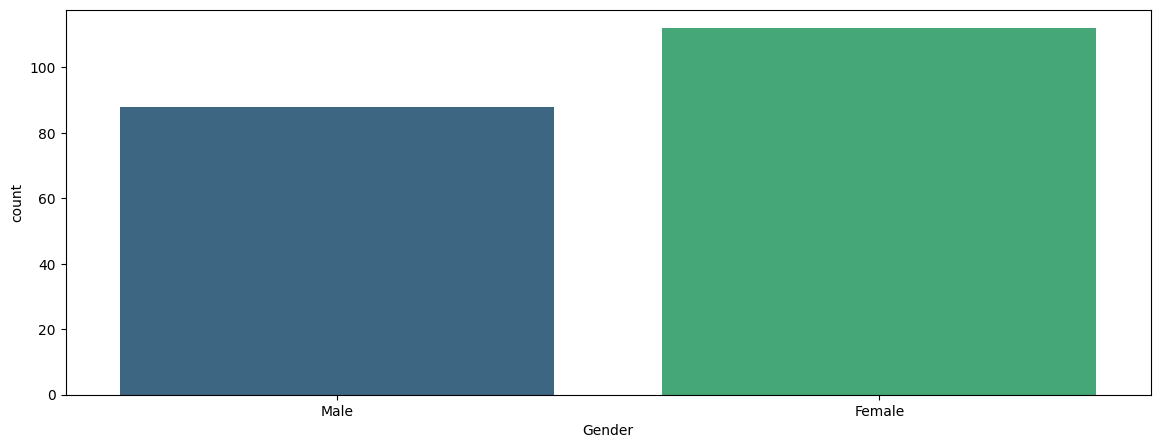

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,5))
sns.countplot(x='Gender',data=cust_data,palette='viridis',hue='Gender')

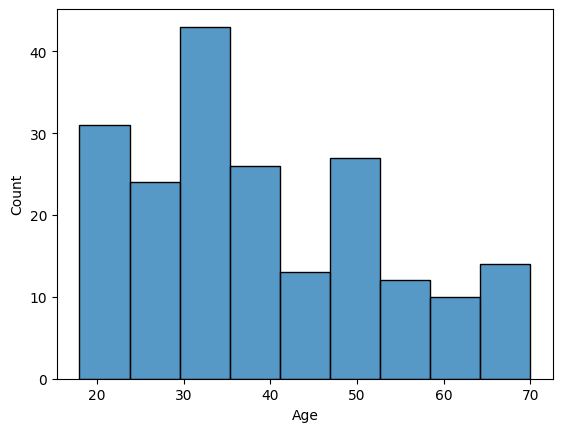

In [42]:
import matplotlib.pyplot as plt
sns.histplot(cust_data['Age'])
plt.show()

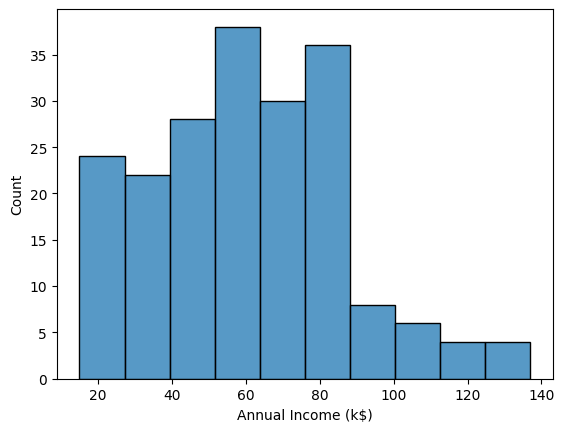

In [43]:
import matplotlib.pyplot as plt
sns.histplot(cust_data['Annual Income (k$)'])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6036\2173038479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Spending Score (1-100)", data=cust_data, palette="Set2")


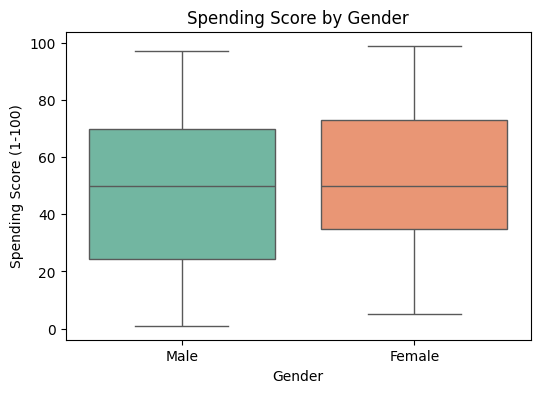

In [44]:
# Boxplot: Gender vs Spending Score
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=cust_data, palette="Set2")

plt.title("Spending Score by Gender")
plt.show()

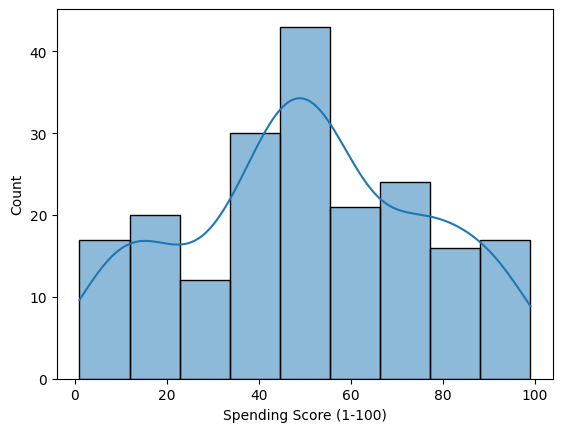

In [45]:
sns.histplot(cust_data
             ["Spending Score (1-100)"], kde=True)
plt.show()

In [46]:
X = cust_data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


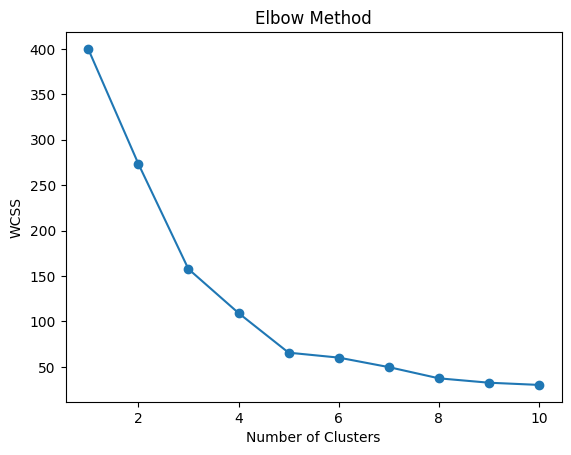

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


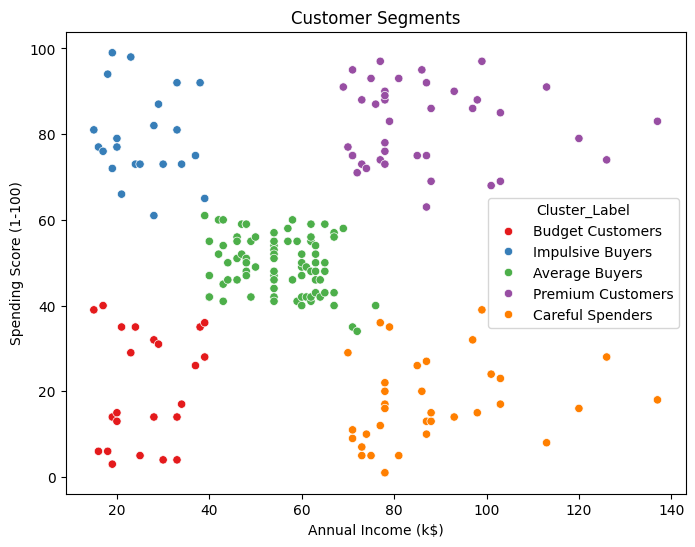

In [56]:
#Scatter Plot
import seaborn as sns
cluster_labels = {
    0: "Average Buyers",
    1: "Premium Customers",
    2: "Impulsive Buyers",
    3: "Careful Spenders",
    4: "Budget Customers"
}

cust_data["Cluster_Label"] = cust_data["Cluster"].map(cluster_labels)

kmeans = KMeans(n_clusters=5, random_state=42)
cust_data["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                hue="Cluster_Label", data=cust_data, palette="Set1")
plt.title("Customer Segments")
plt.show()
